###### Introduction to Network Analysis 2023/24 (v)

## Measures of centrality, PageRank algorithm

You are given IMDb actors collaboration network in Pajek format ([collaboration_imdb.net](http://lovro.fri.uni-lj.si/ina/nets/collaboration_imdb.net)). Your task is to find the most important actors according to different measures of centrality.

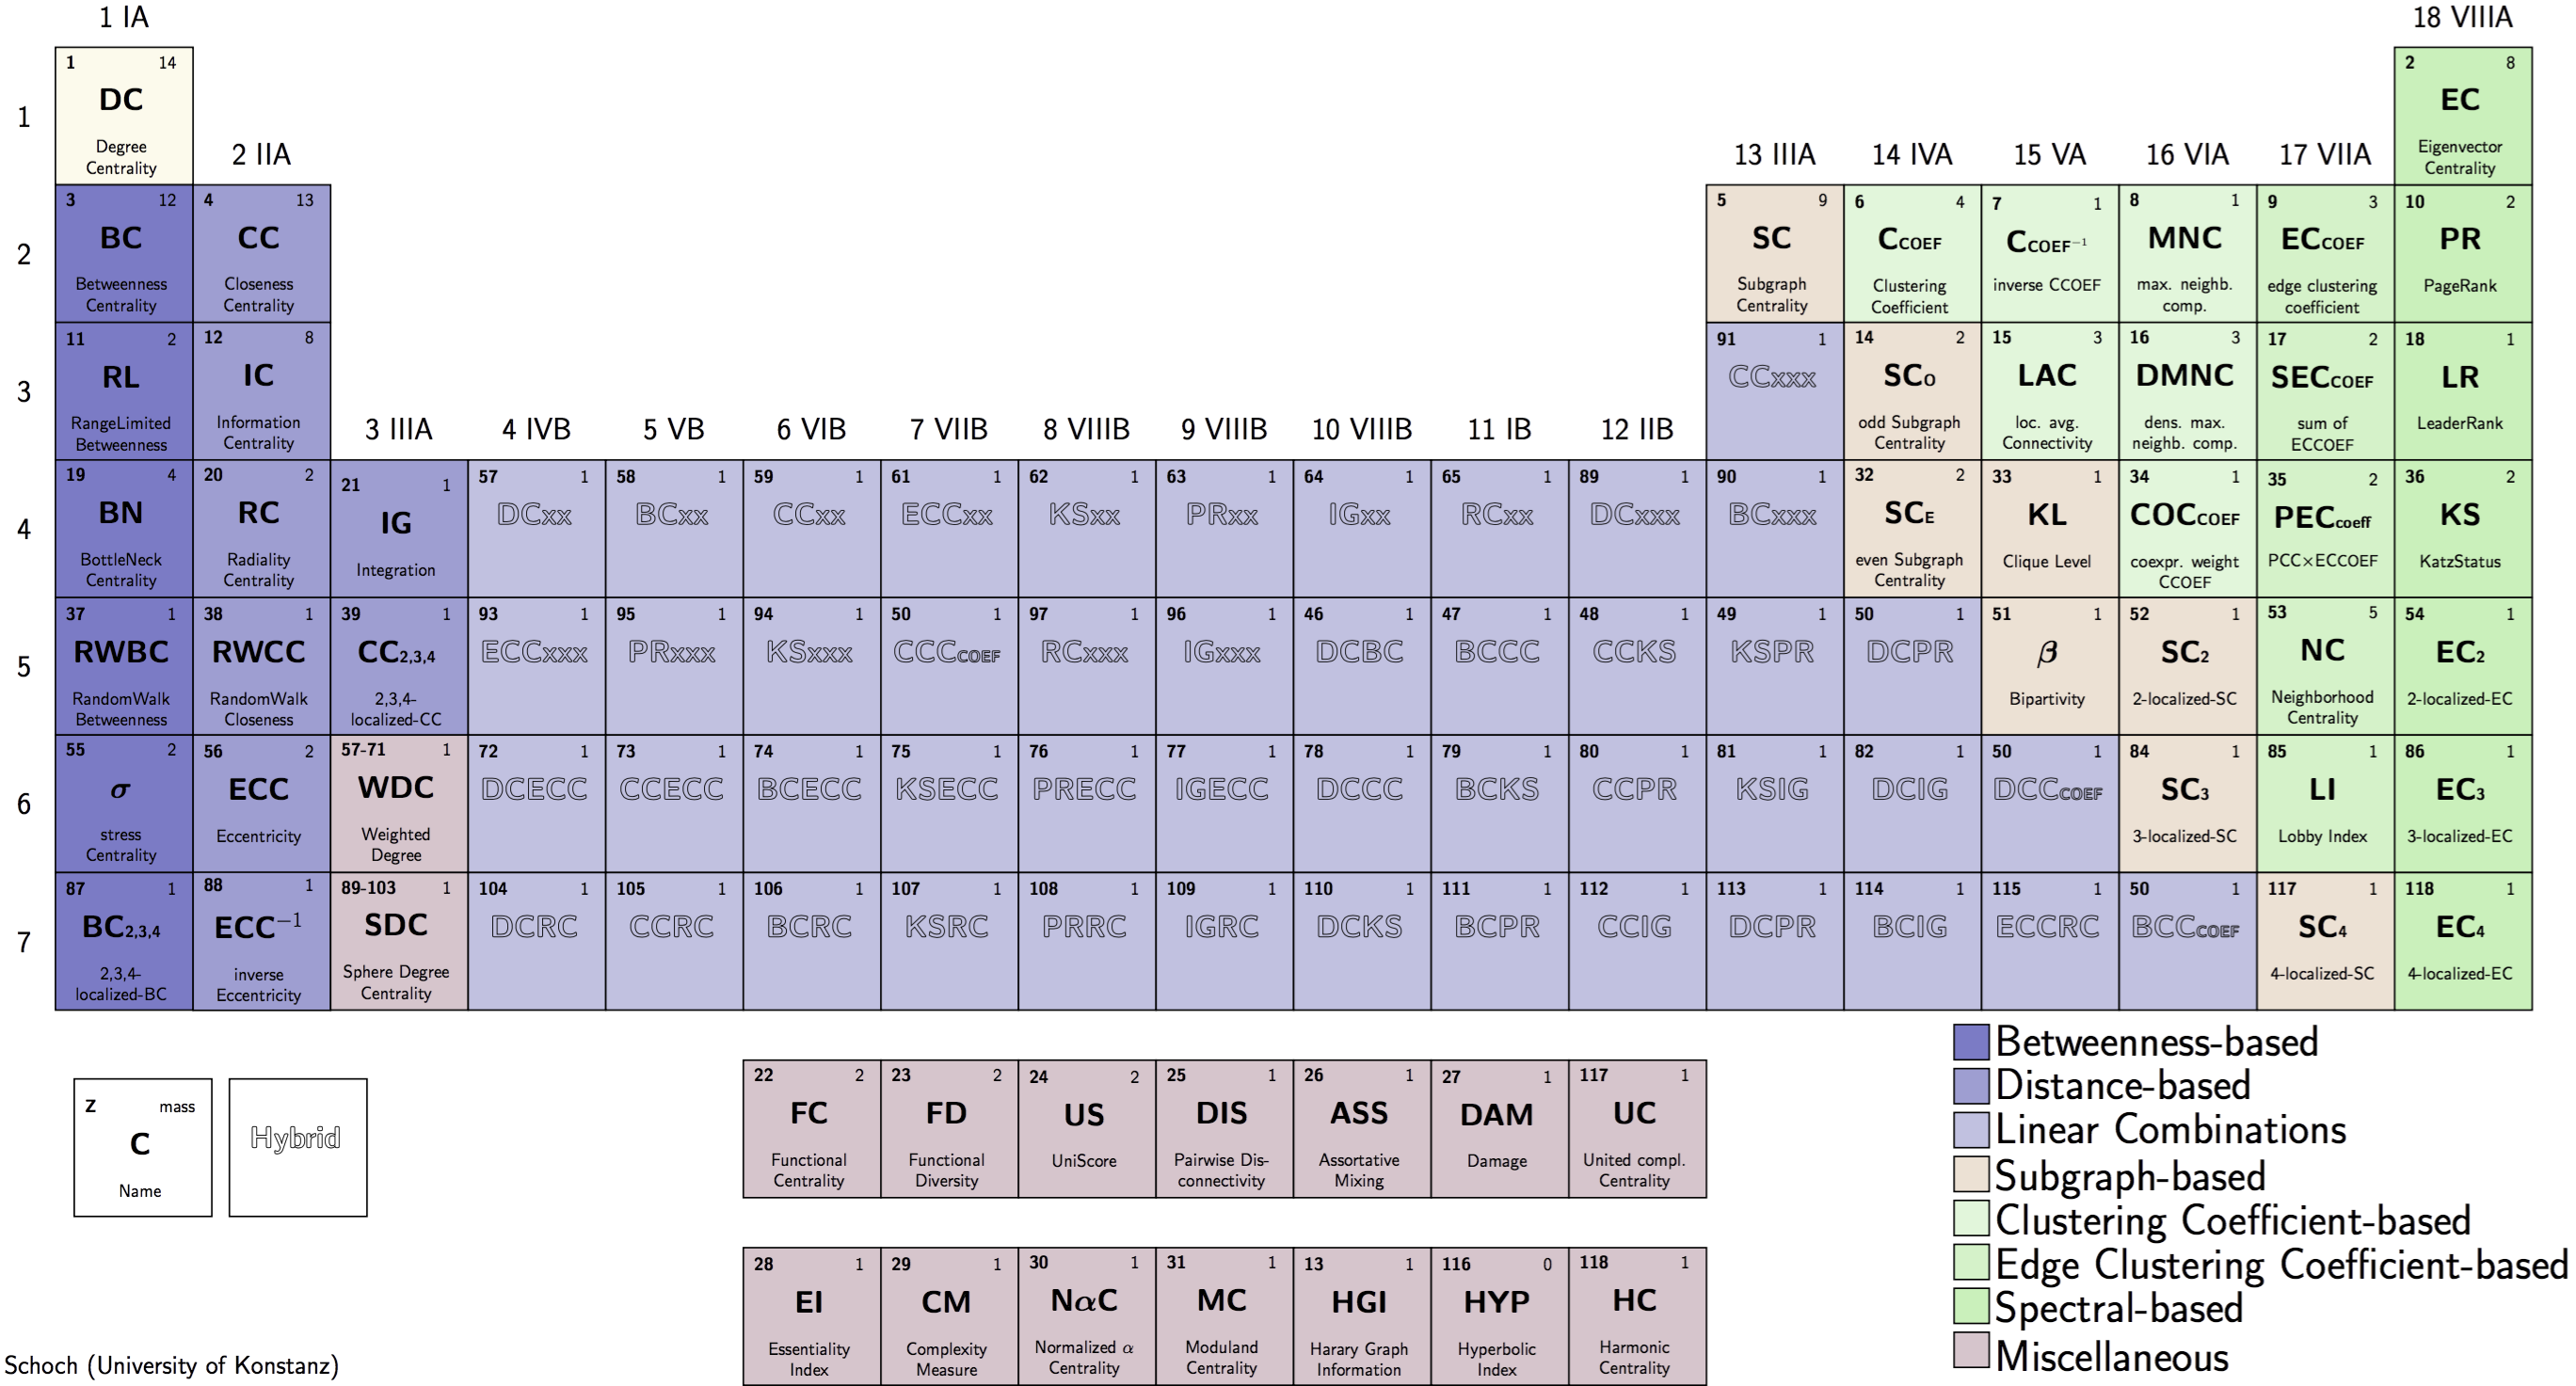

### II. Eigenvector centrality and PageRank algorithm



1. **(code)** Find the most important actors according to the eigenvector centrality $e_i=\lambda_1^{-1}\sum_jA_{ij}e_j$, where $A$ is the network adjacency matrix and $\lambda_1$ is a normalizing constant. You should use the power iteration algorithm shown below. Which actors have the highest $e_i$ (e.g., Hollywood, international, unknown)?

Eigenvector centrality is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

Time complexity: *O(cm)* for $c \approx$ 10-100

In [2]:
import networkx as nx
import utils
G = nx.Graph(utils.read_pajek("collaboration_imdb.net"))

In [3]:
# Function to calculate the eigenvector centrality of nodes in the graph 'G'
def eigenvector_centrality(G, eps = 1e-6):
    # Initialize eigenvector centrality score
    E = [1] * G.number_of_nodes()
    diff = 1
    # Repeat until the change in scores is less than a small value 'eps'
    while diff > eps:
        # Update scores based on neighbors' scores
        U = [sum([E[j] for j in G[i]]) for i in G.nodes()]
        # Normalize scores
        u = sum(U)
        U = [U[i] * len(G) / u for i in G.nodes()]
        # Calculate change in scores
        diff = sum([abs(E[i] - U[i]) for i in G.nodes()])
        # Use the new scores for the next iteration
        E = U
    return {i: E[i] for i in range(len(E))}


utils.actor_names(utils.top_nodes(G, eigenvector_centrality(G), 'eigenvector'))

  Centrality | 'eigenvector'
   92.477817 | 'Benoit, Chris (I)' (225)
   92.477817 | 'Guerrero, Eddie' (225)
   92.038971 | 'Storm, Lance' (225)
   91.947140 | 'Wight, Paul' (221)
   91.928511 | 'Jericho, Chris' (253)
   91.506554 | 'Runnels, Dustin' (220)
   91.446709 | 'Flair, Ric' (219)
   91.379534 | 'Huffman, Booker' (219)
   91.268470 | 'Bischoff, Eric' (218)
   91.260113 | 'Wilson, Torrie' (217)
   91.110063 | 'Gruner, Peter' (218)
   91.067621 | 'Levy, Scott (III)' (226)
   91.056304 | 'Helms, Shane' (216)
   90.816530 | 'Keibler, Stacy' (215)
   90.816530 | 'Greenwald, Nora' (215)



['Chris Benoit',
 'Eddie Guerrero',
 'Lance Storm',
 'Paul Wight',
 'Chris Jericho',
 'Dustin Runnels',
 'Ric Flair',
 'Booker Huffman',
 'Eric Bischoff',
 'Torrie Wilson',
 'Peter Gruner',
 'Scott Levy',
 'Shane Helms',
 'Stacy Keibler',
 'Nora Greenwald']

**The most important actors** according to eigenvector centrality:


| Centrality | 'eigenvector'             |
|------------|---------------------------|
| 92.477817  | 'Guerrero, Eddie' (225)   |
|  92.477817 | 'Benoit, Chris (I)' (225) |
| 92.038971  | 'Storm, Lance' (225)      |
| 91.947140  | 'Wight, Paul' (221)       |
| 91.928511  | 'Jericho, Chris' (253)    |
| 91.506554  | 'Runnels, Dustin' (220)   |
| 91.446709  | 'Flair, Ric' (219)        |
| 91.379534  | 'Huffman, Booker' (219)   |
| 91.268470  | 'Bischoff, Eric' (218)    |
| 91.260113  | 'Wilson, Torrie' (217)    |
| 91.110063  | 'Gruner, Peter' (218)     |
| 91.067621  | 'Levy, Scott (III)' (226) |
| 91.056304  | 'Helms, Shane' (216)      |
| 90.816530  | 'Keibler, Stacy' (215)    |
| 90.816530  | 'Greenwald, Nora' (215)   |

These are once again **wrestlers**.

2. **(code)** Find the most important actors according to the PageRank algorithm $p_i=\alpha\sum_jA_{ij}\frac{p_j}{k_j}+\frac{1-\alpha}{n}$, where $A$ is the network adjacency matrix, $n$ is the number of network nodes, $k_i$ is the degree of node $i$ and $\alpha$ is the damping factor set to $0.85$. You should use the PageRank algorithm shown below. Which actors have the highest $p_i$ (e.g., Hollywood, international, unknown)?

	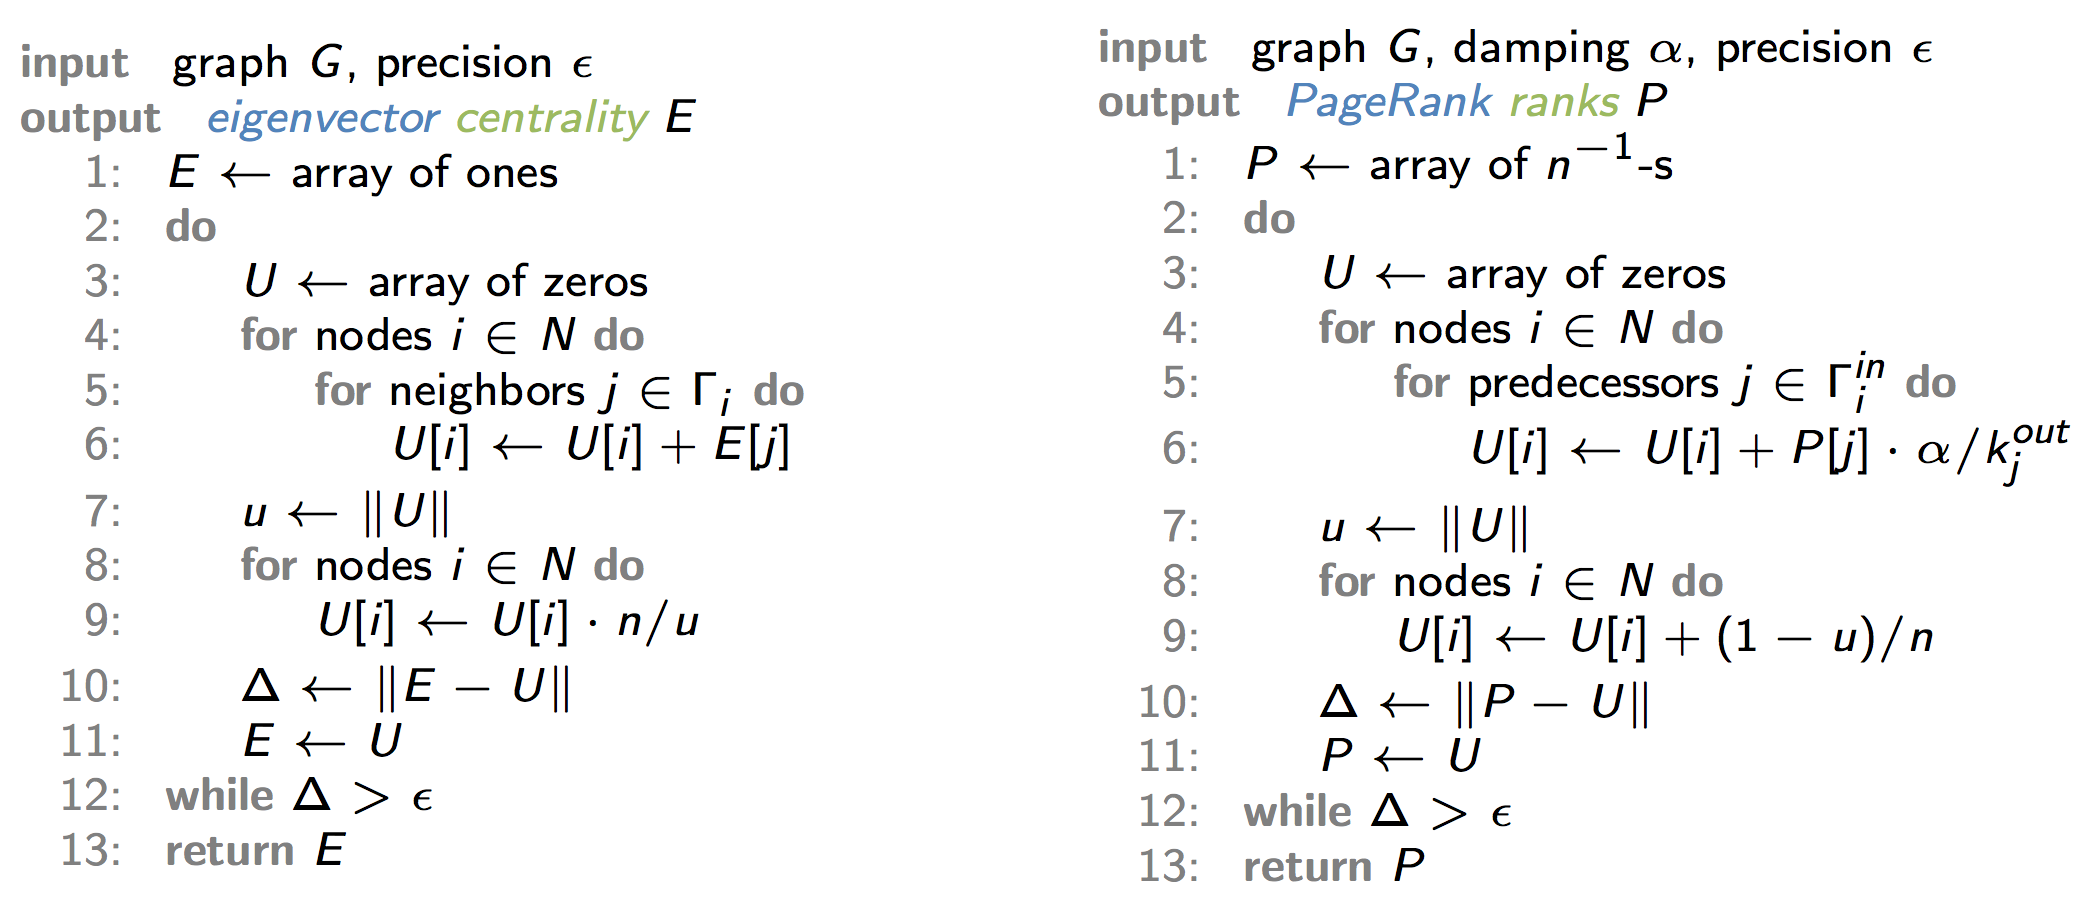

The PageRank algorithm evaluates the importance of each node (actor) based on the number and quality of the links (collaborations) to it. This algorithm is commonly used in search engines (like Google) to rank webpages, but in this case, we're applying it to a graph of actors based on their collaborations.

The PageRank algorithm uses an adjacency matrix A and some initial probabilities p. The adjacency matrix defines the network, while p represents the probabilities for each node.

A damping factor alpha is included to prevent the algorithm from continually bouncing around the graph. This damping factor, usually set to 0.85, represents the probability that a random walk will continue, rather than terminate.

Time complexity: *O(cm)* for $c \approx$ 10-100

In [4]:
# Function to calculate the PageRank of nodes in the graph 'G'
def pagerank(G, alpha = 0.85, eps = 1e-6):
    P = [1 / len(G)] * len(G)
    diff = 1
    # Repeat until the change in scores is less than a small value 'eps'
    while diff > eps:
        # Update scores based on neighbors' scores and the number of their out-links
        U = [sum([P[j] * alpha / G.degree(j) for j in G[i]]) for i in G.nodes()]
        # Calculate a damping factor based on the 'alpha' parameter
        u = sum(U)
        # Apply the damping factor and ensure that the scores sum up to 1
        U = [U[i] + (1 - u) / len(G) for i in G.nodes()]
        # Calculate change in scores
        diff = sum([abs(P[i] - U[i]) for i in G.nodes()])
        P = U
    return {i: P[i] for i in range(len(P))}


utils.actor_names(utils.top_nodes(G, pagerank(G), 'pagerank'))

  Centrality | 'pagerank'
    0.000660 | 'Hanks, Tom' (457)
    0.000642 | 'Jackson, Samuel L.' (427)
    0.000607 | 'Goldberg, Whoopi' (398)
    0.000561 | 'Stiller, Ben' (382)
    0.000547 | 'Davis, Mark (V)' (784)
    0.000542 | 'Lopez, Jennifer (I)' (410)
    0.000540 | 'Berl�and, Fran�ois' (194)
    0.000536 | 'Berry, Halle' (376)
    0.000514 | 'Diaz, Cameron' (361)
    0.000486 | 'Travolta, John' (335)
    0.000476 | 'Jeremy, Ron' (471)
    0.000468 | 'Myers, Mike (I)' (345)
    0.000466 | 'Cruise, Tom' (336)
    0.000464 | 'Schwarzenegger, Arnold' (333)
    0.000463 | 'Baldwin, Alec' (318)



['Tom Hanks',
 'Samuel L. Jackson',
 'Whoopi Goldberg',
 'Ben Stiller',
 'Mark Davis',
 'Jennifer Lopez',
 'Fran�ois Berl�and',
 'Halle Berry',
 'Cameron Diaz',
 'John Travolta',
 'Ron Jeremy',
 'Mike Myers',
 'Tom Cruise',
 'Arnold Schwarzenegger',
 'Alec Baldwin']

**The most important actors** according to PageRank:


| Centrality | 'eigenvector'                  |
|------------|--------------------------------|
| 0.000660   | 'Hanks, Tom' (457)             |
| 0.000642   | 'Jackson, Samuel L.' (427)     |
| 0.000607   | 'Goldberg, Whoopi' (398)       |
| 0.000561   | 'Stiller, Ben' (382)           |
| 0.000547   | 'Davis, Mark (V)' (784)        |
| 0.000542   | 'Lopez, Jennifer (I)' (410)    |
| 0.000540   | 'Berland, Francois' (194)      |
| 0.000536   | 'Berry, Halle' (376)           |
| 0.000514   | 'Diaz, Cameron' (361)          |
| 0.000486   | 'Travolta, John' (335)         |
| 0.000476   | 'Jeremy, Ron' (471)            |
| 0.000468   | 'Myers, Mike (I)' (345)        |
| 0.000466   | 'Cruise, Tom' (336)            |
| 0.000464   | 'Schwarzenegger, Arnold' (333) |
|  0.000463  | 'Baldwin, Alec' (318)          |

These are famous **Hollywood actors**.